In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy import signal
import statsmodels.formula.api as smf
import pandas as pd

# LED Voltage vs Intensity

In [3]:
# Get the data
file_name ='linearity.csv'

with open(file_name) as file:
    reader = csv.reader(file)
    i = 0
    for row in reader:
        if i==0:
            small_V_values = np.array([float(row[j]) for j in range(len(row))])
        if i == 2:
            large_V_values = np.array([float(row[j]) for j in range(len(row))])
        i += 1
        
file_name ='linearity_mid.csv'
with open(file_name) as file:
    reader = csv.reader(file)
    i = 0
    for row in reader:
        if i==0:
            mid_V_values = np.array([float(row[j]) for j in range(len(row))])
        i += 1

In [4]:
large_vs = np.arange(0.1,10.1,0.1)
small_vs = np.arange(0.02,0.82,0.01)
mid_vs = np.arange(0.03, 3.0, 0.03)

In [5]:
plt.plot(small_vs, small_V_data.y)
plt.plot(mid_vs, mid_V_data.I)
plt.plot(large_vs, large_V_data.I)

NameError: name 'small_V_data' is not defined

I = 1.0522907851843682e-06 V + 1.101882267476892e-07


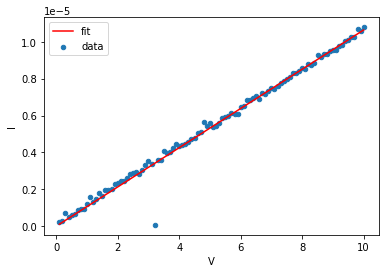

In [6]:
large_V_data = pd.DataFrame({'I':large_V_values,
                              'V':large_vs})

linear_model = smf.wls(formula='I~V', data = large_V_data)
linear_result = linear_model.fit(cov_type='fixed_scale')

best_fit = linear_result.params
large_V_data.plot(x='V', y='I', label='data', kind='scatter')

fit_str = 'I = '+str(best_fit[1])+ ' V + '+str(best_fit[0])
plt.plot([large_vs[0],large_vs[-1]], [best_fit[0], best_fit[0] + best_fit[1] * large_vs[-1]], 'r', label='fit')
plt.legend()
print(fit_str)

best_fit_highV = best_fit

I = 1.0317456308236764e-06 V + 5.14777692480568e-07


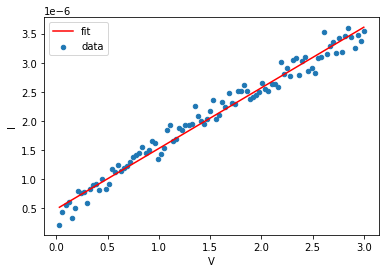

In [7]:
mid_V_data = pd.DataFrame({'I':mid_V_values,
                              'V':mid_vs})

linear_model = smf.wls(formula='I~V', data = mid_V_data)
linear_result = linear_model.fit(cov_type='fixed_scale')

best_fit = linear_result.params
mid_V_data.plot(x='V', y='I', label='data', kind='scatter')

fit_str = 'I = '+str(best_fit[1])+ ' V + '+str(best_fit[0])
plt.plot([mid_vs[0],mid_vs[-1]], [best_fit[0], best_fit[0] + best_fit[1] * mid_vs[-1]], 'r', label='fit')
plt.legend()
print(fit_str)

best_fit_midV = best_fit

I = 1.263937219820445e-06 V + -4.954272571626204e-07
x intercept = 0.3919714123404016


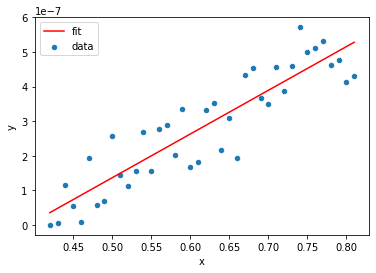

In [18]:
these_small_vs = small_vs[:]
small_V_data = pd.DataFrame({'y':small_V_values[40:],
                              'x':small_vs[40:]})
linear_model = smf.wls(formula='y~x', data = small_V_data)
linear_result = linear_model.fit(cov_type='fixed_scale')

best_fit = linear_result.params
small_V_data.plot(x='x', y='y', label='data', kind='scatter')

fit_str = 'I = '+str(best_fit[1])+ ' V + '+str(best_fit[0])
x_intercept = -best_fit[0]/best_fit[1] 
plt.plot([these_small_vs[40],these_small_vs[-1]], [best_fit[0]+best_fit[1]*these_small_vs[40], best_fit[0] + best_fit[1] * these_small_vs[-1]], 'r', label='fit')
plt.legend()
print(fit_str)
print('x intercept = ' + str(x_intercept))

best_fit_lowV = best_fit

I = 1.263937219820445e-06 V + -4.954272571626204e-07
x intercept = 0.3919714123404016


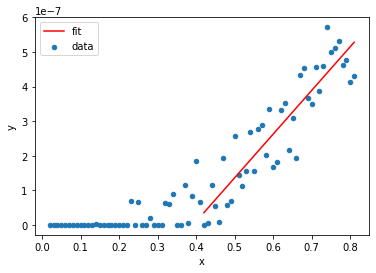

In [19]:
small_V_data = pd.DataFrame({'y':small_V_values[:],
                              'x':small_vs[:]})
small_V_data.plot(x='x', y='y', label='data', kind='scatter')
fit_str = 'I = '+str(best_fit[1])+ ' V + '+str(best_fit[0])
x_intercept = -best_fit[0]/best_fit[1] 
plt.plot([these_small_vs[40],these_small_vs[-1]], [best_fit[0]+best_fit[1]*these_small_vs[40], best_fit[0] + best_fit[1] * these_small_vs[-1]], 'r', label='fit')
plt.legend()
print(fit_str)
print('x intercept = ' + str(x_intercept))

In [10]:
print(large_V_data.I)

0     2.486381e-07
1     2.649826e-07
2     7.384346e-07
3     5.136299e-07
4     6.225397e-07
          ...     
95    1.023807e-05
96    1.026716e-05
97    1.070529e-05
98    1.058520e-05
99    1.078116e-05
Name: I, Length: 100, dtype: float64


High voltage fit: I = 1.0522907851843682e-06 V + 1.101882267476892e-07
                x intercept = -0.10471271657898583
Low voltage fit: I = 1.263937219820445e-06 V + -4.954272571626204e-07
                x intercept = 0.3919714123404016


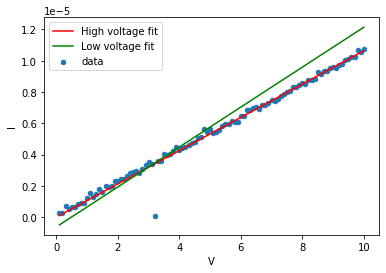

In [123]:
large_V_data.plot(x='V', y='I', label='data', kind='scatter')

fit_highV = 'I = '+str(best_fit_highV[1])+ ' V + '+str(best_fit_highV[0])
x_intercept_highV = -best_fit_highV[0]/best_fit_highV[1] 
plt.plot([large_vs[0],large_vs[-1]], [best_fit_highV[0], best_fit_highV[0] + best_fit_highV[1] * large_vs[-1]], 'r', label='High voltage fit')
print('High voltage fit: ' +fit_highV)
print('                x intercept = ' + str(x_intercept_highV))


fit_lowV = 'I = '+str(best_fit_lowV[1])+ ' V + '+str(best_fit_lowV[0])
x_intercept = -best_fit_lowV[0]/best_fit_lowV[1] 
plt.plot([large_vs[0],large_vs[-1]], [best_fit_lowV[0], best_fit_lowV[0] + best_fit_lowV[1] * large_vs[-1]], 'g', label='Low voltage fit')
plt.legend()
print('Low voltage fit: ' +fit_lowV)
print('                x intercept = ' + str(x_intercept))

In [20]:
def LED_voltage_to_intensity(V):
    """
    Returns the intensity of the LED give the LED voltage, based off
    of linear fits done in Linearity_Analysis.ipynb. 
    """
    # From large range fit:
    m = 1.0522907851843682e-06
    b = 0 #1.101882267476892e-07

    # Mid range fit: 1.0317456308236764e-06 V + 5.14777692480568e-07
     
    return m*V + b

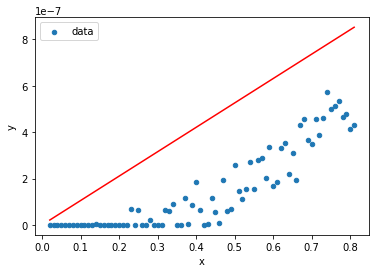

In [21]:
small_V_data = pd.DataFrame({'y':small_V_values[:],
                              'x':small_vs[:]})
small_V_data.plot(x='x', y='y', label='data', kind='scatter')
plt.plot(small_vs, [LED_voltage_to_intensity(V) for V in small_vs], 'r')

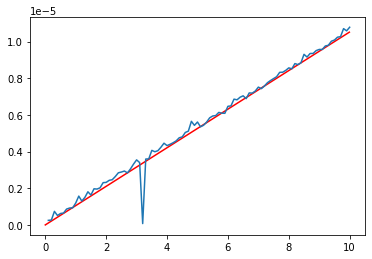

In [22]:
plt.plot(np.arange(0.0,10,.01), [LED_voltage_to_intensity(V) for V in np.arange(0.0,10,.01)], 'r')
plt.plot(large_vs, large_V_data.I)

In [147]:
LED_voltage_to_intensity(1.0)

7.685099626578245e-07

# LED Voltage vs SiPM Peak voltage

In [23]:
# Get the data
file_name ='ledV_to_sipmV.csv'

with open(file_name) as file:
    reader = csv.reader(file)
    i = 0
    for row in reader:
        if i==2:
            voltages_50ns = np.array([float(row[j]) for j in range(len(row))])
        if i == 4:
            sipm_peaks_50ns = np.array([float(row[j]) for j in range(len(row))])
        if i==8:
            voltages_250ns = np.array([float(row[j]) for j in range(len(row))])
        if i == 10:
            sipm_peaks_250ns = np.array([float(row[j]) for j in range(len(row))])
        i += 1

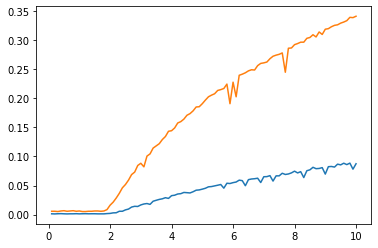

In [24]:
plt.plot(voltages_50ns, sipm_peaks_50ns)
plt.plot(voltages_250ns, sipm_peaks_250ns)

SiPM peak V = 0.06889511364373464 V + -0.12118396893514279


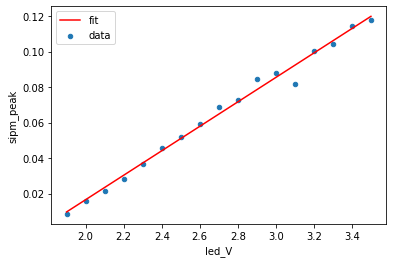

In [25]:
data = pd.DataFrame({'sipm_peak':sipm_peaks_250ns[18:35],
                     'led_V':voltages_250ns[18:35]})

linear_model = smf.wls(formula='sipm_peak~led_V', data = data)
linear_result = linear_model.fit(cov_type='fixed_scale')

best_fit = linear_result.params
data.plot(x='led_V', y='sipm_peak', label='data', kind='scatter')

fit_str = 'SiPM peak V = '+str(best_fit[1])+ ' V + '+str(best_fit[0])
plt.plot([data.led_V.values[0],data.led_V.values[-1]], [best_fit[0]+best_fit[1]*data.led_V.values[0], best_fit[0] + best_fit[1] * data.led_V.values[-1]], 'r', label='fit')
plt.legend()
print(fit_str)

best_fit_250ns = best_fit

SiPM peak V = 0.06889511364373464 V + -0.12118396893514279


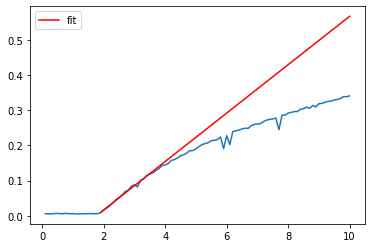

In [26]:
plt.plot(voltages_250ns, sipm_peaks_250ns)
plt.plot([data.led_V.values[0],voltages_250ns[-1]], [best_fit[0]+best_fit[1]*data.led_V.values[0], best_fit[0] + best_fit[1] * voltages_250ns[-1]], 'r', label='fit')
plt.legend()
print(fit_str)


SiPM peak V = 0.014264022538903087 V + -0.026668937550506203


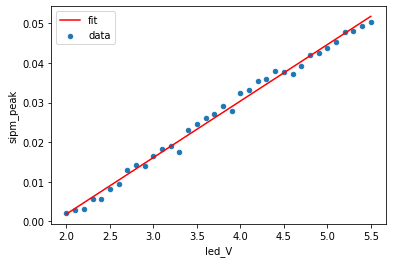

In [27]:
data = pd.DataFrame({'sipm_peak':sipm_peaks_50ns[19:55],
                     'led_V':voltages_50ns[19:55]})

linear_model = smf.wls(formula='sipm_peak~led_V', data = data)
linear_result = linear_model.fit(cov_type='fixed_scale')

best_fit = linear_result.params
data.plot(x='led_V', y='sipm_peak', label='data', kind='scatter')

fit_str = 'SiPM peak V = '+str(best_fit[1])+ ' V + '+str(best_fit[0])
plt.plot([data.led_V.values[0],data.led_V.values[-1]], [best_fit[0]+best_fit[1]*data.led_V.values[0], best_fit[0] + best_fit[1] * data.led_V.values[-1]], 'r', label='fit')
plt.legend()
print(fit_str)

best_fit_50ns = best_fit

SiPM peak V = 0.014264022538903087 V + -0.026668937550506203


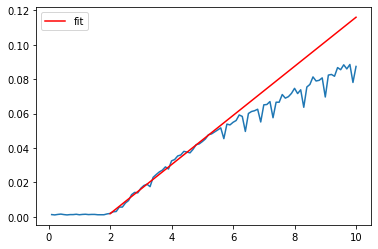

In [28]:
plt.plot(voltages_50ns, sipm_peaks_50ns)
plt.plot([data.led_V.values[0],voltages_50ns[-1]], [best_fit[0]+best_fit[1]*data.led_V.values[0], best_fit[0] + best_fit[1] * voltages_50ns[-1]], 'r', label='fit')
plt.legend()
print(fit_str)

In [225]:
def ledVoltage_to_sipmPeak(led_V):
    """
    Returns the correct SiPM peak voltage
    based on the LED voltage, to correct
    for sipm saturation. This fit was found
    in the Linearity_Analysis.ipynb using
    a 50ns pulse width. 
    """
    m = 0.014264022538903087
    b = -0.026668937550506203
    
    if led_V < 2.0:
        return 0.0
    
    return m*led_V + b

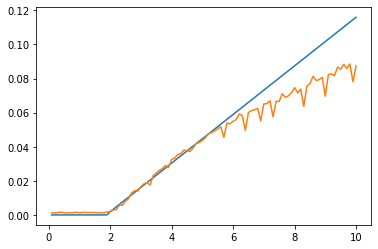

In [224]:
plt.plot(voltages_50ns,[ledVoltage_to_sipmPeak(V) for V in voltages_50ns])
plt.plot(voltages_50ns, sipm_peaks_50ns)

In [48]:
# Filtering data to get a smother curve
def boxcar_average(x, w):
    """ x is data, w is box width"""
    return np.convolve(x, np.ones(w), 'valid') / w

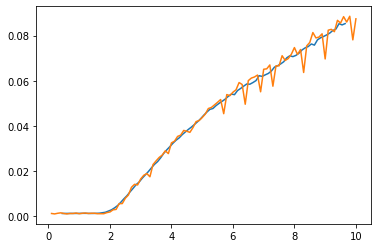

In [49]:
w = 8
plt.plot(boxcar_average(voltages_50ns, w), boxcar_average(sipm_peaks_50ns, w))
plt.plot(voltages_50ns, sipm_peaks_50ns)

In [55]:
look_up_table = pd.DataFrame(dict(
                                V_sipm = boxcar_average(sipm_peaks_50ns, w),
                                V_led = boxcar_average(voltages_50ns, w)))

In [56]:
look_up_table.to_csv('sipm_linearity_lookup_table.csv', index=False)